In [14]:
from sklearn.datasets import make_blobs
%matplotlib inline

In [514]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

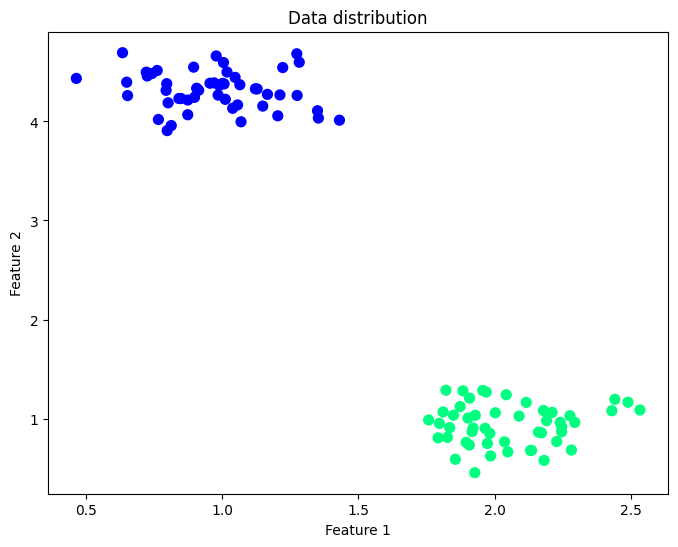

In [244]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.20)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plt.title("Data distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [220]:
model=SVC(C=0.1,kernel="rbf",)

In [221]:
model.fit(X,y)

SVC(C=0.1)

In [222]:
pred=model.predict(X)

In [223]:
confusion_matrix(pred,y)

array([[50,  0],
       [ 0, 50]], dtype=int64)

In [224]:
# ?model

In [225]:
model.support_vectors_ 

array([[0.79871293, 3.90762803],
       [1.06940257, 3.99653859],
       [1.20415022, 4.05682216],
       [0.76655949, 4.01978374],
       [1.28282592, 4.59765908],
       [0.63501604, 4.69394241],
       [1.27392052, 4.68296516],
       [1.430221  , 4.01291419],
       [1.35290022, 4.03423552],
       [1.34978168, 4.10833175],
       [0.81364082, 3.95853081],
       [0.46567212, 4.43451105],
       [2.48791471, 1.16496925],
       [2.43985593, 1.19376662],
       [2.53189648, 1.08655956],
       [1.90735492, 1.20626658],
       [1.96823681, 1.26751641],
       [2.0416192 , 1.2403322 ],
       [1.757016  , 0.985542  ],
       [1.82064284, 1.2863879 ],
       [2.18031381, 0.57725213],
       [1.95566103, 1.28357007],
       [1.88302238, 1.27967665],
       [1.85522445, 0.58870944],
       [1.92654384, 0.45298303]])

In [226]:
model.support_

array([ 3,  5, 38, 40, 41, 42, 52, 54, 56, 67, 74, 95,  0,  7, 15, 22, 34,
       37, 39, 44, 59, 65, 80, 93, 96])

In [239]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def plot_svm_decision_boundary(X, y, kernel='linear', C=1.0):
    """
    Plot the decision boundary and margin lines for a support vector machine (SVM).
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        The input data.
    y : array-like, shape (n_samples,)
        The target values.
    kernel : string, optional (default='linear')
        Specifies the kernel type to be used in the algorithm.
        Options are 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'.
    C : float, optional (default=1.0)
        Penalty parameter C of the error term.
    
    Returns
    -------
    None
    
    """
    # fit the SVM classifier
    clf = svm.SVC(kernel=kernel,degree=1, C=C)
    clf.fit(X, y)

    # create a mesh of points to plot the decision boundary and margin lines
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the decision boundary and margin lines
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')

    # plot the margin lines
    x_min = X[:, 0].min() - 1
    x_max = X[:, 0].max() + 1
    w = clf.dual_coef_ [0]
    a = -w[0] / w[1]
    xx = np.linspace(x_min, x_max)
    yy = a * xx - (clf.intercept_[0]) / w[1]
#     plt.plot(xx, yy, 'k--', label='Margin Line')

    # plot the support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.legend()
    plt.show()


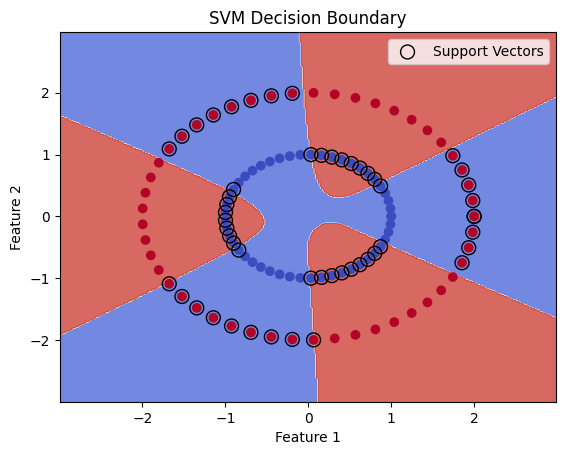

In [242]:
plot_svm_decision_boundary(X,y,kernel="sigmoid",C=10)

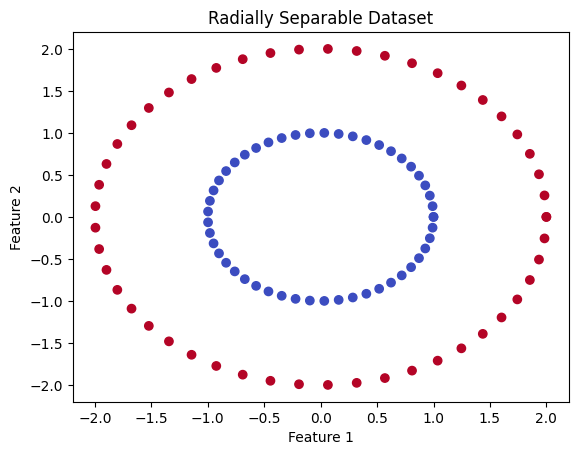

In [230]:
import numpy as np
import matplotlib.pyplot as plt

# set the number of samples and the radius of the inner and outer circles
n_samples = 100
inner_radius = 1
outer_radius = 2

# create the inner and outer circles
inner_circ_x = inner_radius * np.cos(np.linspace(0, 2*np.pi, n_samples//2))
inner_circ_y = inner_radius * np.sin(np.linspace(0, 2*np.pi, n_samples//2))
outer_circ_x = outer_radius * np.cos(np.linspace(0, 2*np.pi, n_samples//2))
outer_circ_y = outer_radius * np.sin(np.linspace(0, 2*np.pi, n_samples//2))

# combine the circles to create the dataset
X = np.vstack((np.hstack((inner_circ_x[:, np.newaxis], inner_circ_y[:, np.newaxis])),
               np.hstack((outer_circ_x[:, np.newaxis], outer_circ_y[:, np.newaxis]))))
y = np.hstack((np.zeros(n_samples//2), np.ones(n_samples//2)))

# plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Radially Separable Dataset')
plt.show()

### KNN

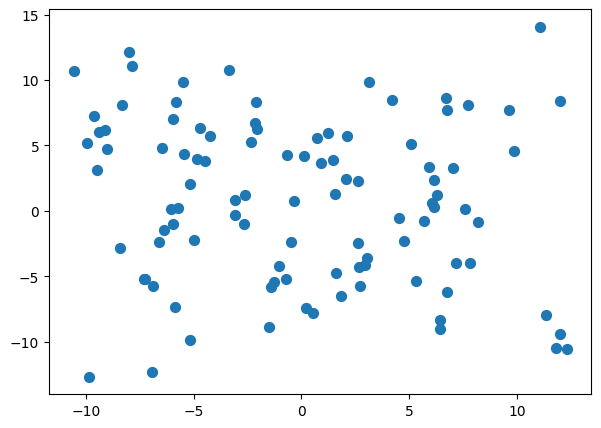

In [272]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=100, centers=100,
                       cluster_std=2)
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], s=50);

In [275]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, max_iter=1)
kmeans.fit(X)
labels = kmeans.predict(X)
print(labels)

[ 5 10 11  3 11 12  7  0  1 13  9  1  6  5  3  7  5  3  5  4  2  2  5  7
  8  8  4  5  5  8  9 13 15  5  1  7  1  6  3  8 10  9  2  7  5 18  0 19
 11  6 17 10 18 18  7  1  3  6  9  6 17  4  7 11 14  4 13  0  3 18 16 11
 14  5 10 15  6  0 19 12 18 19  9 19 10  6  1  2 10  0  8  8 15 12  2  0
  7  9 17 17]


In [276]:
#Accuracy metrics:
# Calculate Silhoutte Score
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)
# Higher the better!

Silhouetter Score: 0.405


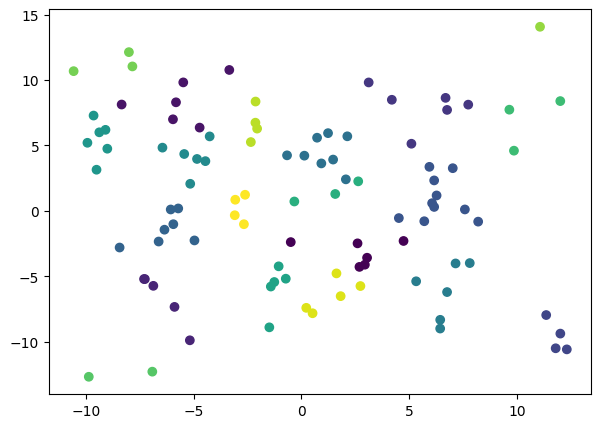

In [277]:
plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

In [278]:
print(kmeans.inertia_)
print(kmeans.cluster_centers_)

274.8405602125789
[[  2.58413015  -3.19362607]
 [ -5.61356446   8.39818263]
 [ -6.50182304  -6.6803675 ]
 [  6.17420641   7.95070608]
 [ 11.8636239   -9.61249789]
 [  6.35682211   0.8958131 ]
 [ -6.30151523  -1.36909485]
 [  1.17996381   4.21257007]
 [  6.64842801  -6.1564675 ]
 [ -5.10200724   4.11832427]
 [ -9.42637593   5.43099728]
 [ -1.19264655  -5.91259433]
 [  0.61699832   1.00272267]
 [ 10.9296456    6.49684817]
 [ -8.39290122 -12.49073208]
 [ -8.8059218   11.28685654]
 [ 11.06456463  14.07410209]
 [ -2.16881925   6.66190664]
 [  1.3813795   -6.45944321]
 [ -2.8636859    0.18098789]]


In [279]:
#Deciding Optimal Number of CLusters:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
sse,db,score = {}, {},{}
for k in range(2, 100):
    kmeans = KMeans(n_clusters=k, max_iter=10000000,random_state=10).fit(X)
    labels=kmeans.predict(X)
    sse[k] = kmeans.inertia_ 
    score[k] = silhouette_score(X, labels, metric='euclidean')
    # Inertia: Sum of squared distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X,labels)

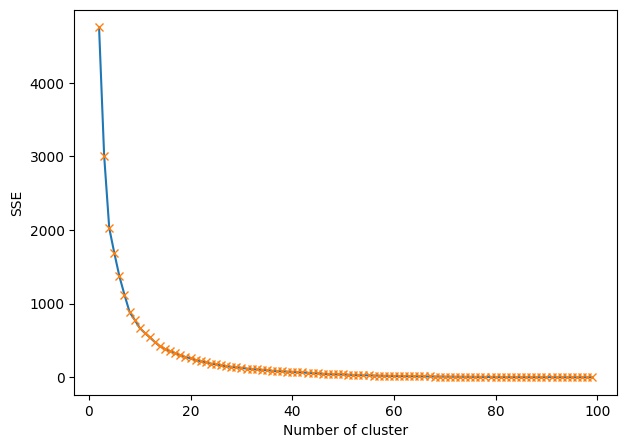

In [280]:
#Elbow Method
plt.figure(figsize=(7,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.plot(list(sse.keys()), list(sse.values()),"x")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

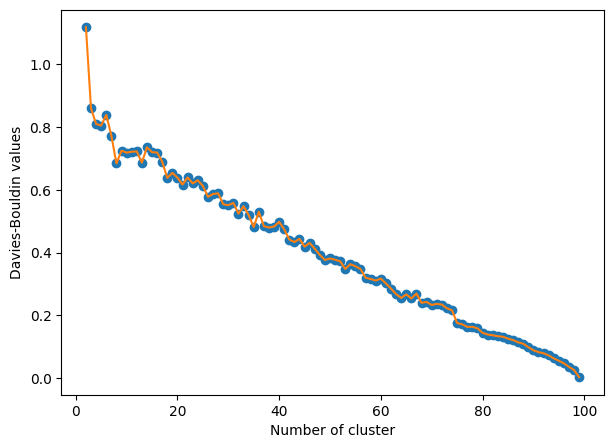

In [281]:
#Davis-Boldin index
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()), list(db.values()), 'o')
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

In [282]:
# A lower Davies-Bouldin values score indicates better cluster separation and 
# A higher Davies-Bouldin values score suggests that the clusters are less well-separated.

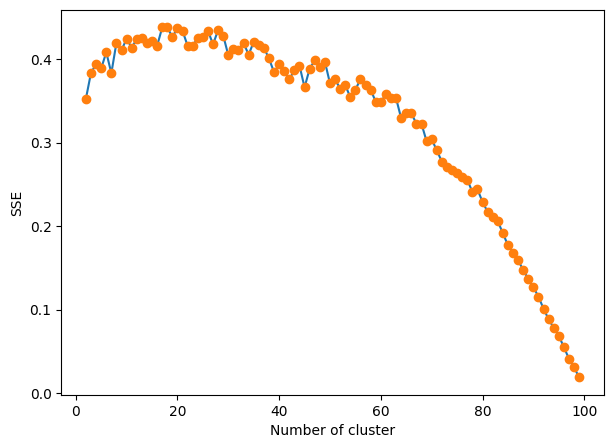

In [283]:
plt.figure(figsize=(7,5))
plt.plot(list(score.keys()), list(score.values()))
plt.plot(list(score.keys()), list(score.values()),"o")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### GMM

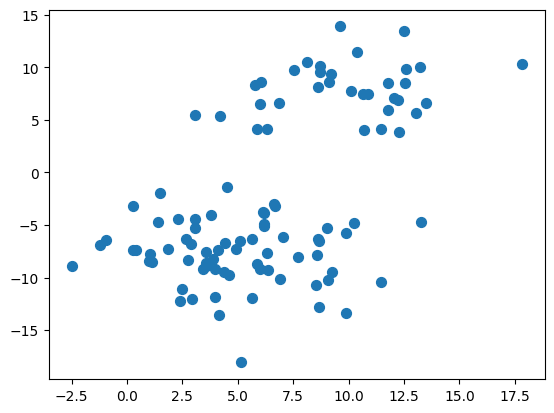

In [362]:
X, y = make_blobs(n_samples=100, centers=3,
                  random_state=45536, cluster_std=3)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [363]:
?make_blobs

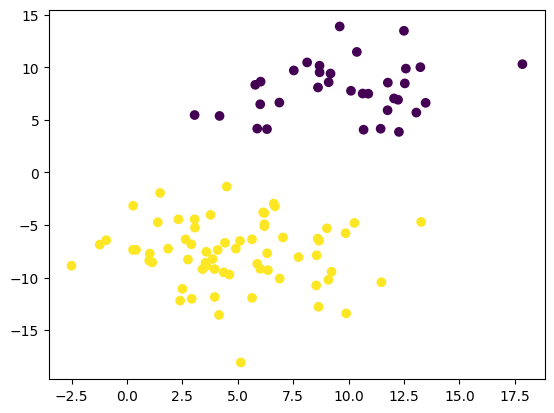

In [364]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.show()

In [365]:
gmm.means_

array([[ 9.79968484,  7.87546363],
       [ 4.85507867, -7.68489538]])

In [366]:
gmm.covariances_

array([[[ 9.54744925,  1.73936286],
        [ 1.73936286,  6.395031  ]],

       [[10.21949434, -0.64861388],
        [-0.64861388,  9.29954887]]])

In [367]:
gmm.weights_

array([0.33996142, 0.66003858])

In [368]:
#Predicting probability:
probs = gmm.predict_proba(X)
probs[0,:]
probs = probs.round(3)
print(probs)

[[0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.997 0.003]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.998 0.002]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.999 0.001]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.

In [369]:
#VIsualization Ellipse:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [370]:
#  To get the centers of the each cluster,
import scipy
gmm = GaussianMixture(n_components=2)
out=gmm.fit(X)
centers = np.empty(shape=(out.n_components, X.shape[1]))
#finding the cemter of each cluster
for i in range(out.n_components):
    density = scipy.stats.multivariate_normal(cov=out.covariances_[i], mean=out.means_[i]).logpdf(X)
    centers[i, :] = X[np.argmax(density)]
centers=centers.astype(int)
print("Center of clusters: \n",centers)

Center of clusters: 
 [[ 4 -7]
 [10  7]]


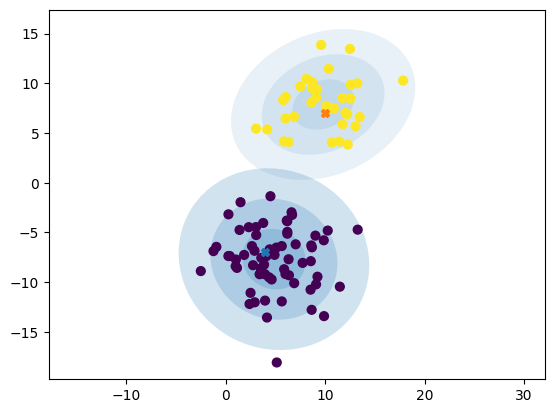

In [371]:
# For creating some circles around the center of each cluster within the visualizations
from scipy.spatial.distance import cdist
# For creating some circles for probability area around the center of each cluster within the visualizations
from matplotlib.patches import Ellipse
# gmm = GaussianMixture(n_components=4)
plot_gmm(gmm, X)
for i in range(2):
    plt.plot(centers[i][0],centers[i][1],'X')
plt.show()

In [372]:
#AIC and BIC for determining Optimal K:
Sum_bic = []
Sum_aic = []

K = range(1,8)
for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm = gmm.fit(X)
    Sum_bic.append(gmm.bic(X))
    Sum_aic.append(gmm.aic(X))

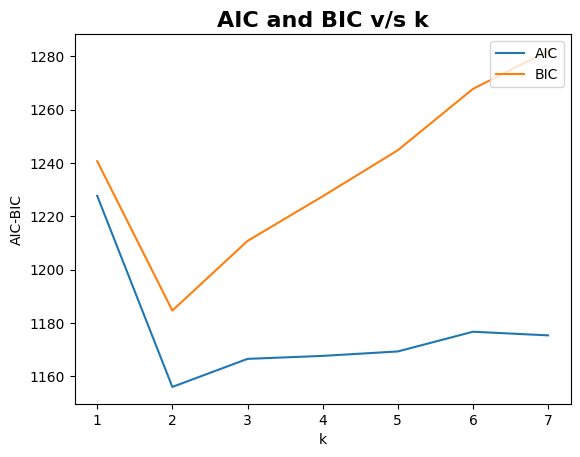

In [373]:
x1 = K
y1 = Sum_aic
plt.plot(x1, y1, label = "AIC")
x2 = K
y2 = Sum_bic
plt.plot(x2, y2, label = "BIC")

plt.title("AIC and BIC v/s k", fontsize=16, fontweight='bold')
plt.xlabel("k")
plt.ylabel("AIC-BIC")
plt.legend(loc='upper right')
plt.show()

In [345]:
# lower is better

In [380]:
from scipy.stats import norm
norm.cdf(1)

0.8413447460685429

### Precision and Recall

In [590]:
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score, confusion_matrix, recall_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print(confusion_matrix(y_true,y_pred))

Recall: 0.900
Precision: 0.750
[[9970   30]
 [  10   90]]


### Decomposing a Matrix

In [384]:
import numpy as np
A = np.array([[5,4,3],[4,7,2],[3,2,7]])
A

array([[5, 4, 3],
       [4, 7, 2],
       [3, 2, 7]])

In [385]:
# Computing the eigen values and Eigen Vectors
eval, evec = np.linalg.eig(A)

In [387]:
# Columns of evec are the eigen vectors
vec1=np.array(evec[:,0])
vec2=np.array(evec[:,1])
vec3=np.array(evec[:,2])

In [388]:
# Approximating The original matrix from these eigen values and Eigen vectors
# M = L1V1V1' + L2V2V2' + ....
mat1 = eval[0]*np.dot(vec1[:,None],vec1[None,:])
mat2 = eval[1]*np.dot(vec2[:,None],vec2[None,:])
mat3 = eval[2]*np.dot(vec3[:,None],vec3[None,:])

In [392]:
M=mat1+mat2+mat3
M

array([[5., 4., 3.],
       [4., 7., 2.],
       [3., 2., 7.]])

### PCA

In [399]:
# Toy dataset
Y = [[8,4,9,1,5],
[9,6,9,5,5],
[10,8,9,7,5],
[10,5,9,6,5],
[5,4,9,2,5],
[2,7,9,9,5],
[7,5,9,8,6],
[3,4,9,8,5],
[4,2,9,7,5],
[1,4,9,10,5]]
columnnames = ['Location','City','Society','Ambience','Vicinity to Airport']
rownames = ['House 1','House 2','House 3','House 4','House 5','House 6','House 7','House 8','House 9','House 10']

In [420]:
# Converting them into dataframe using pandas
import pandas as pd
Y = pd.DataFrame(Y, columns = columnnames, index=rownames)
Y

,Location,City,Society,Ambience,Vicinity to Airport
House 1,8,4,9,1,5
House 2,9,6,9,5,5
House 3,10,8,9,7,5
House 4,10,5,9,6,5
House 5,5,4,9,2,5
House 6,2,7,9,9,5
House 7,7,5,9,8,6
House 8,3,4,9,8,5
House 9,4,2,9,7,5
House 10,1,4,9,10,5


In [436]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
results = pca.fit(Y)

In [437]:
# These are the directions in which the data will be projected to get the transformeedd dataset
print(results.components_)
#one can notice that for third feature, the contribution of 'Society' feature is zero in all three eigenvectors because it has no contribution
#Also, for the 'fifth' feature, i.e. 'Vicinity to airport', the contribution is less because there is very less variance in the data for that feature

[[-8.08043525e-01 -1.05099654e-01  0.00000000e+00  5.79671724e-01
   6.46182619e-04]
 [-4.50728592e-01 -5.22540662e-01  1.11022302e-16 -7.23006030e-01
  -3.25157301e-02]
 [-3.77102721e-01  8.44981400e-01 -2.22044605e-16 -3.72386432e-01
  -7.16122688e-02]]


In [465]:
Y_transformed = results.transform(Y)
Y_transformed
# This the matrix after projections taken to smaller dimention

array([[-4.67462647,  3.35894009,  0.42841034],
       [-3.37418241, -1.02889395,  0.25172469],
       [-3.23308179, -3.97071593,  0.81981191],
       [-3.49745455, -1.68008791, -1.34274586],
       [-1.67082417,  3.98811983,  1.18733207],
       [ 4.49570951, -1.28835859,  2.24687941],
       [ 0.08666565, -1.80642993, -1.02782283],
       [ 3.42329322,  0.55154083, -0.29278108],
       [ 2.24577728,  1.8688996 , -1.98746016],
       [ 6.19872372,  0.00698596, -0.2833485 ]])

In [448]:
results.explained_variance_ # how much each component of PCA captures the varience

array([14.90216021,  6.17284113,  1.59473423])

In [466]:
# TO DO PCA From Sctarch, you need to calc the mean centered Matix first,
# then find the Covarience matrix and then find thr eigen vector of the matrix
from mlxtend.preprocessing import MeanCenterer
mc = MeanCenterer().fit(Y)
Y_mean_centered=mc.transform(Y)

In [467]:
Y_T_Y=np.dot(Y_mean_centered.transpose(),Y_mean_centered)
eigrnVal,evec=np.linalg.eig(Y_T_Y)

In [458]:
Y_T_Y

array([[ 1.009e+02,  1.990e+01,  0.000e+00, -4.270e+01,  1.100e+00],
       [ 1.990e+01,  2.690e+01,  0.000e+00,  8.300e+00,  1.000e-01],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       [-4.270e+01,  8.300e+00,  0.000e+00,  7.610e+01,  1.700e+00],
       [ 1.100e+00,  1.000e-01,  0.000e+00,  1.700e+00,  9.000e-01]])

In [468]:
evec # columns are the eigen vectors

array([[-8.08043525e-01, -4.50728592e-01,  3.77102721e-01,
         4.12666429e-02,  0.00000000e+00],
       [-1.05099654e-01, -5.22540662e-01, -8.44981400e-01,
        -4.37236046e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 5.79671724e-01, -7.23006030e-01,  3.72386432e-01,
         5.07081639e-02,  0.00000000e+00],
       [ 6.46182619e-04, -3.25157301e-02,  7.16122688e-02,
        -9.96902198e-01,  0.00000000e+00]])

In [469]:
print(results.components_) # they are matchin from the inbuilt PCA function's eigen values

[[-8.08043525e-01 -1.05099654e-01  0.00000000e+00  5.79671724e-01
   6.46182619e-04]
 [-4.50728592e-01 -5.22540662e-01  1.11022302e-16 -7.23006030e-01
  -3.25157301e-02]
 [-3.77102721e-01  8.44981400e-01 -2.22044605e-16 -3.72386432e-01
  -7.16122688e-02]]


In [473]:
# To get Back the Orignal Matrix approximation from the transformed Matrix Y_transformed
original = results.inverse_transform(Y_transformed)
np.round(original,2)

array([[8.  , 4.  , 9.  , 1.  , 4.96],
       [9.  , 6.  , 9.  , 4.99, 5.11],
       [9.99, 8.01, 9.  , 6.99, 5.17],
       [9.99, 5.01, 9.  , 5.99, 5.25],
       [5.  , 3.99, 9.  , 2.01, 4.88],
       [2.  , 7.  , 9.  , 9.  , 4.98],
       [7.03, 4.97, 9.  , 8.04, 5.23],
       [3.  , 4.  , 9.  , 7.99, 5.11],
       [3.99, 2.01, 9.  , 6.99, 5.18],
       [0.99, 4.01, 9.  , 9.99, 5.12]])

Text(0, 0.5, 'cumulative explained variance')

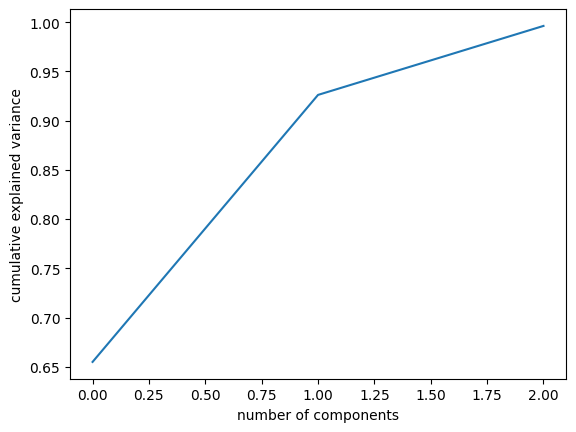

In [510]:
plt.plot(np.cumsum(results.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Singular Value Decomposition (SVD)

In [474]:
# M = U.S.VT
B = np.array([[2,3,4],[1,5,0]])
B

array([[2, 3, 4],
       [1, 5, 0]])

In [477]:
# Evaluating Tranpose
BT=B.T
BT

array([[2, 1],
       [3, 5],
       [4, 0]])

In [500]:
# We define BT_B and B_BT
BT_B = BT@B
B_BT = B@BT

In [501]:
# Calculation of U
eval1, evec1 = np.linalg.eig(B_BT)
print(evec1) #  U
print(eval1)

[[ 0.73752756 -0.67531703]
 [ 0.67531703  0.73752756]]
[44.56604817 10.43395183]


In [502]:
# Calculation of V
eval2, evec2 = np.linalg.eig(BT_B)
print(evec2) #  V
print(eval2)

[[ 0.32211546  0.92747779  0.18980669]
 [ 0.83723059 -0.18549556 -0.51442816]
 [ 0.4419124  -0.32461723  0.83626377]]
[4.45660482e+01 7.21644966e-16 1.04339518e+01]


In [503]:
evec2[:,[1,2]]=-evec2[:,[2,1]]
evec2 # Arranging the columns in a decreasing eigen value order

array([[ 0.32211546, -0.18980669, -0.92747779],
       [ 0.83723059,  0.51442816,  0.18549556],
       [ 0.4419124 , -0.83626377,  0.32461723]])

In [504]:
# Calculation for S
sigma = np.array([[eval1[0]**0.5,0,0],[0,eval1[1]**0.5,0]])
sigma

array([[6.67578072, 0.        , 0.        ],
       [0.        , 3.23016282, 0.        ]])

In [505]:
# Restroing the original Matrix
np.round(evec1 @ sigma @ evec2.T,decimals = 3)

array([[ 2.,  3.,  4.],
       [ 1.,  5., -0.]])

In [506]:
# appoximation by each vecotrs:
vec11=np.array(evec1[:,0])
vec12=np.array(evec2[:,0])
matr1 = (eval1[0]**0.5)*np.dot(vec11[:,None],vec12[None,:])

vec21=np.array(evec1[:,1])
vec22=np.array(evec2[:,1])
matr2 = (eval1[1]**0.5)*np.dot(vec21[:,None],vec22[None,:])

In [507]:
np.round(matr1+matr2)

array([[ 2.,  3.,  4.],
       [ 1.,  5., -0.]])

In [508]:
# USING DIRECT SVD FUNCTION OF NUMPY
U, s, V = np.linalg.svd(B) 

In [509]:
S=[[s[0],0,0],[0,s[1],0]]
np.round(U@ S @V,decimals=3) # "@" is used for matris multiplication

array([[ 2.,  3.,  4.],
       [ 1.,  5., -0.]])

### Linear Discriminative Analysis (LDA)

In [511]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [512]:
# Used Iris Dataset and used LDA
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

In [568]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values
for i in range(len(y)):
    if(y[i]=="Iris-setosa"):
        y[i]=0
    if(y[i]=="Iris-virginica"):
        y[i]=1
    if(y[i]=="Iris-versicolor"):
        y[i]=2
y=np.array(y)
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [569]:
from sklearn.preprocessing import StandardScaler
# Scaling the input
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [570]:
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

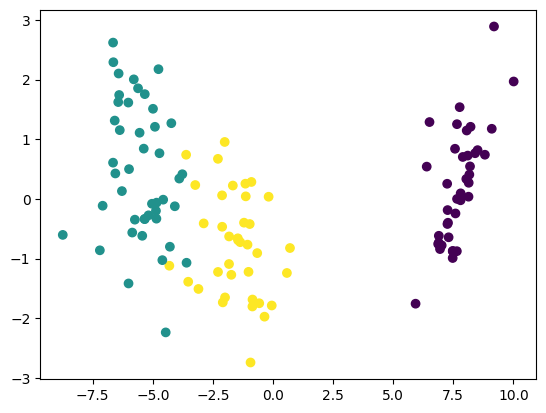

In [571]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [579]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=2323)
results = pca.fit(X_train)
x_train_pca=results.transform(X_train)

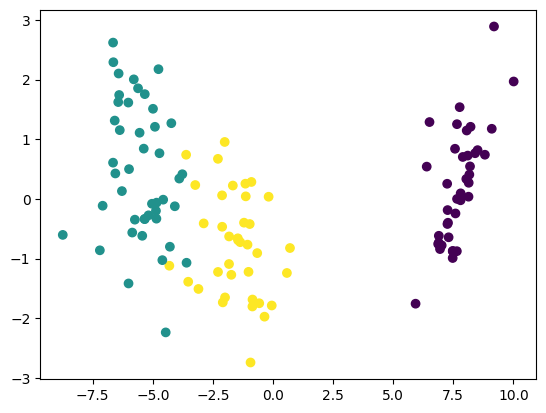

In [580]:
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train)

In [581]:
# COINCIDENTLY the PCA and LDA are macthing, but it is NOT necessay!!!

In [582]:
# now you can perform Clustering or any thing after dimentionality reduction

## TEXT ANALYTICS